In [3]:
import pandas as pd
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a DataFrame
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = y

In [13]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
ranges = {}
for col in iris_df.columns:
    ranges[col] = (iris_df[col].min(), iris_df[col].max())
ranges

{'sepal length (cm)': (np.float64(4.3), np.float64(7.9)),
 'sepal width (cm)': (np.float64(2.0), np.float64(4.4)),
 'petal length (cm)': (np.float64(1.0), np.float64(6.9)),
 'petal width (cm)': (np.float64(0.1), np.float64(2.5)),
 'species': (np.int64(0), np.int64(2))}

In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Explore the Iris Dataset

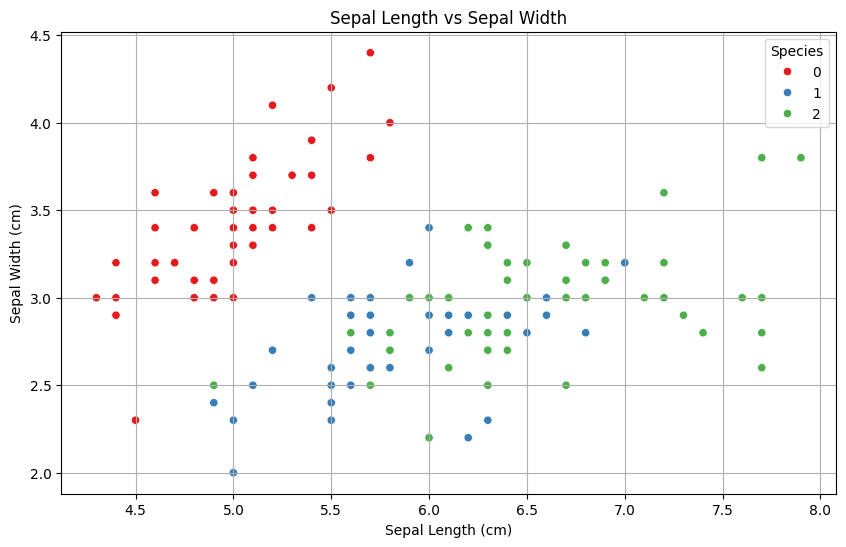

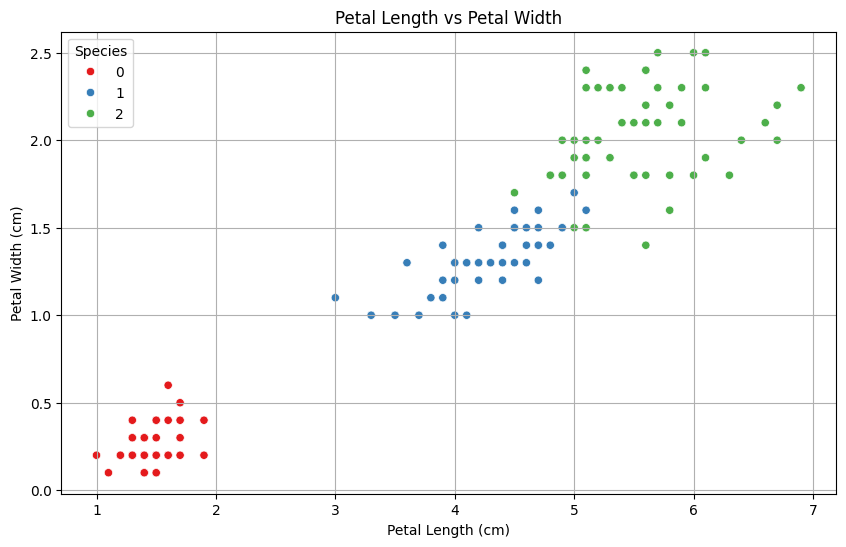

In [4]:
# Plot Sepal Length vs Sepal Width
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='species', palette='Set1')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.grid()
plt.show()

# Plot Petal Length vs Petal Width
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='species', palette='Set1')
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.grid()
plt.show()

In [ ]:
# Plot Sepal Length vs Sepal Width
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='species', palette='Set1')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.grid()
plt.show()



In [6]:
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
dtype: object

In [8]:
# Convert numeric columns to 32-bit data types
numeric_columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
for col in numeric_columns:
    iris_df[col] = iris_df[col].astype('float32')

# Convert species column to int32
iris_df['species'] = iris_df['species'].astype('int32')

# Display the updated data types
print("Updated data types:")
iris_df.dtypes

Updated data types:


sepal length (cm)    float32
sepal width (cm)     float32
petal length (cm)    float32
petal width (cm)     float32
species                int32
dtype: object

In [15]:
# check missing values
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [27]:
import json
import seaborn as sns 

sepal_data = {
    "type": "scatter_plot",
    "id": "sepal_chart",
    "title": "Sepal Length vs Sepal Width",
    "comment": "This scatter plot illustrates the relationships between sepal length and width, as well as petal length and width, for the different species of iris.",
    "data": {
        "datasets": [
            
        ],
        "axis": {
            "x": {
                "label": "Sepal Length (cm)"
            },
            "y": {
                "label": "Sepal Width (cm)"  
            }
        }
    }
}

IRIS_SPECIES = ['setosa', 'versicolor', 'virginica']
COLORS = ['red', 'blue', 'green']
for species in iris_df['species'].unique():
    subset = iris_df[iris_df['species'] == species]
    sepal_data['data']['datasets'].append({
        "id": IRIS_SPECIES[species],
        "points": [{"x": round(float(row['sepal length (cm)']), 4), "y": round(float(row['sepal width (cm)']), 4)} for index, row in subset.iterrows()],
        "style": {
            "color": COLORS[species],
            # "size": 2
        }
    })

# save to JSON
with open('graphs/sepal_data.json', 'w') as json_file:
    json.dump(sepal_data, json_file)

In [26]:
import json
import seaborn as sns 

petal_data = {
    "type": "scatter_plot",
    "id": "petal_chart",
    "title": "Petal Length vs Petal Width",
    "data": {
        "datasets": [
            
        ],
        "axis": {
            "x": {
                "label": "petal Length (cm)"
            },
            "y": {
                "label": "petal Width (cm)"  
            }
        }
    }
}

IRIS_SPECIES = ['setosa', 'versicolor', 'virginica']
COLORS = ['red', 'blue', 'green']
for species in iris_df['species'].unique():
    subset = iris_df[iris_df['species'] == species]
    petal_data['data']['datasets'].append({
        "id": IRIS_SPECIES[species],
        "points": [{"x": round(float(row['petal length (cm)']), 4), "y": round(float(row['petal width (cm)']), 4)} for index, row in subset.iterrows()],
        "style": {
            "color": COLORS[species],
            # "size": 2
        }
    })

# save to JSON
with open('graphs/petal_data.json', 'w') as json_file:
    json.dump(petal_data, json_file)